<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


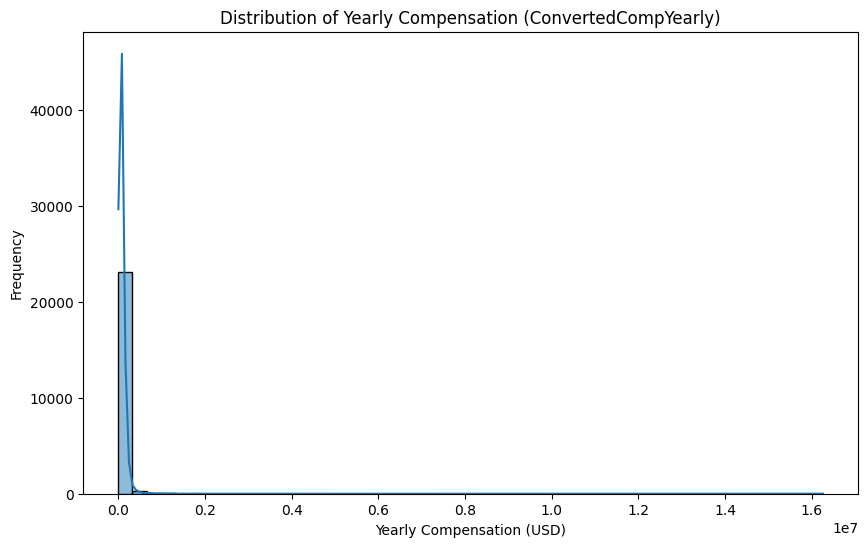

Compensation Statistics:
 count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


In [3]:
## Write your code here
# Plot histogram for ConvertedCompYearly
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True)
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

# Basic statistics
print("Compensation Statistics:\n", df['ConvertedCompYearly'].describe())

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:

# Filter for full-time employees
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Calculate median compensation
median_comp_full_time = full_time_df['ConvertedCompYearly'].median()
print(f"Median Compensation for Full-Time Employees: ${median_comp_full_time:.2f}")## Write your code here

Median Compensation for Full-Time Employees: $69814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



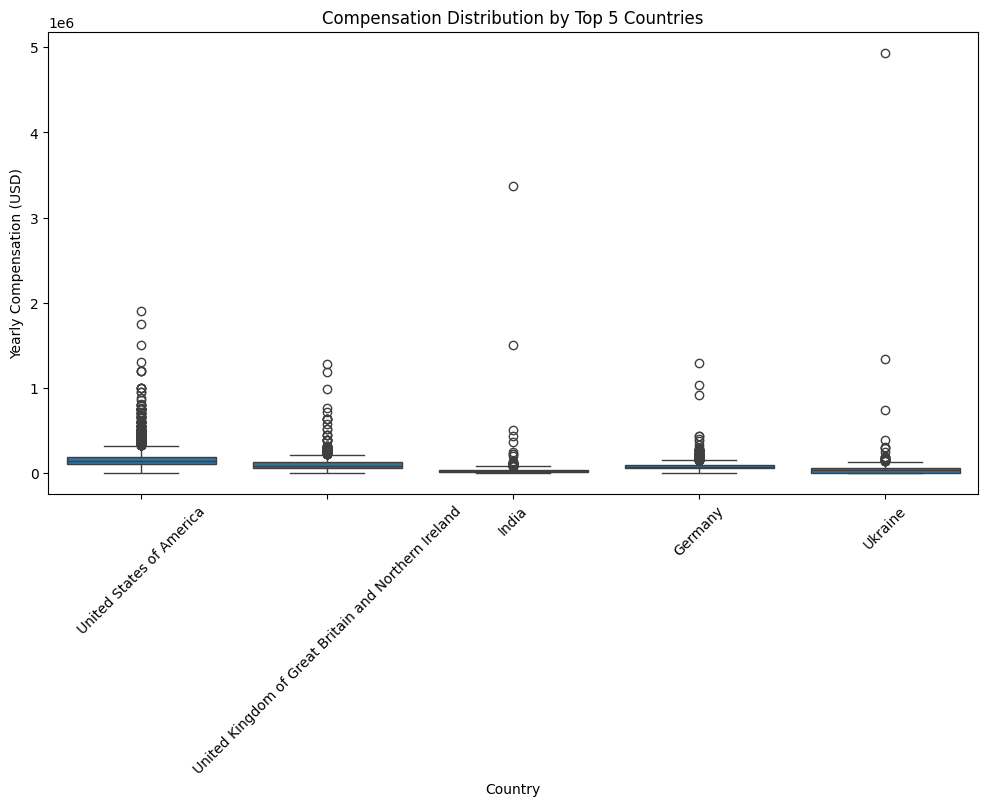

Compensation Statistics by Country:
                                                      count           mean  \
Country                                                                     
Germany                                             2046.0   77054.550831   
India                                               1037.0   30513.611379   
Ukraine                                             1474.0   39455.767300   
United Kingdom of Great Britain and Northern Ir...  1391.0  102603.315600   
United States of America                            4677.0  161072.335685   

                                                              std   min  \
Country                                                                   
Germany                                              56449.165030   1.0   
India                                               118281.453843   1.0   
Ukraine                                             138316.634608   1.0   
United Kingdom of Great Britain and Northern Ir.

In [5]:
## Write your code here
# Select top 5 countries by respondent count for simplicity
top_countries = df['Country'].value_counts().head(5).index
df_top_countries = df[df['Country'].isin(top_countries)]

# Box plot to compare compensation by country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_countries)
plt.title('Compensation Distribution by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45)
plt.show()

# Summary statistics by country
print("Compensation Statistics by Country:\n", df_top_countries.groupby('Country')['ConvertedCompYearly'].describe())

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
## Write your code here
# Calculate IQR for ConvertedCompYearly
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size
print("Original DataFrame Size:", df.shape)
print("New DataFrame Size (without outliers):", df_no_outliers.shape)
print(f"Number of Outliers Removed: {df.shape[0] - df_no_outliers.shape[0]}")

Original DataFrame Size: (65437, 114)
New DataFrame Size (without outliers): (22457, 114)
Number of Outliers Removed: 42980


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                      ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.406993       -0.059643
WorkExp                         0.406993  1.000000       -0.032388
JobSatPoints_1                 -0.059643 -0.032388        1.000000


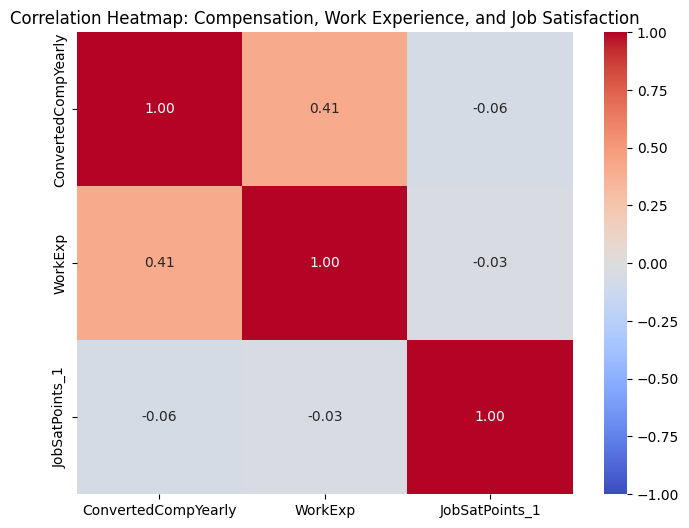

In [7]:
## Write your code here
# Select key variables
key_vars = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
df_key = df_no_outliers[key_vars].dropna()  # Drop rows with NaN in these columns

# Calculate correlation matrix
correlation_matrix = df_key.corr(method='pearson')
print("Correlation Matrix:\n", correlation_matrix)

# Visualize with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


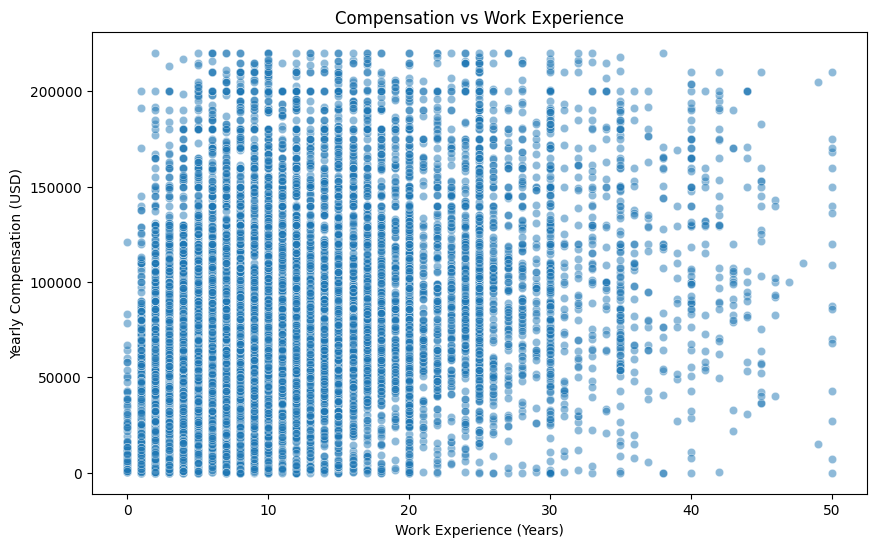

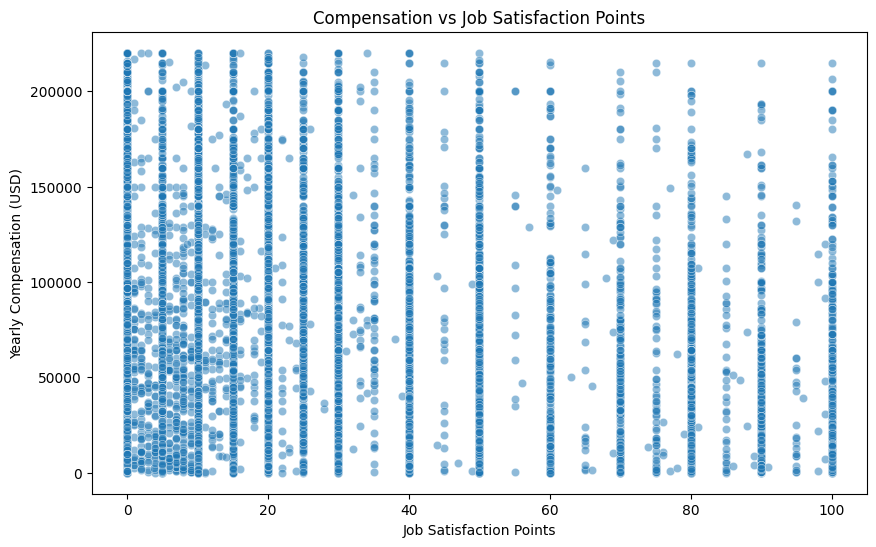

In [8]:
## Write your code here
# Scatter plot: ConvertedCompYearly vs WorkExp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WorkExp', y='ConvertedCompYearly', data=df_key, alpha=0.5)
plt.title('Compensation vs Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation (USD)')
plt.show()

# Scatter plot: ConvertedCompYearly vs JobSatPoints_1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='JobSatPoints_1', y='ConvertedCompYearly', data=df_key, alpha=0.5)
plt.title('Compensation vs Job Satisfaction Points')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Yearly Compensation (USD)')
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
